In [3]:
from tensorflow.keras.datasets import imdb

In [4]:
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=5000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Red neuronal LSTM
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential

In [7]:
X_train[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369,

In [8]:
y_train[:2]

array([1, 0])

In [10]:
len(X_train[0])

218

In [13]:
max([len(i)for i in X_train])

2494

In [14]:
MAX_LEN = 1000

In [15]:
from tensorflow.keras.preprocessing import sequence
X_train = sequence.pad_sequences(X_train,MAX_LEN)
X_test = sequence.pad_sequences(X_test,MAX_LEN)

In [28]:
# Creación de LSTM
# Generamos el modelo
model = Sequential()

# Definimos capa de Embedding
model.add(Embedding(input_dim = 5000, output_dim = 100, input_length=MAX_LEN))

# Definimos la arquitectura de la LSTM
model.add(LSTM(units = 100))

# Apagamos en cada iteracción un 20% de las neuronas para evitar el sobreajuste
model.add(Dropout(rate=0.2))

# Capa de salida
model.add(Dense(units=1, activation="sigmoid")) # La salida es de dimensión 1, 0 o 1

# Definimos función de pérdida y optimizador
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
%%time
model_hist = model.fit(x=X_train,y=y_train,batch_size=1024,epochs=15)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 336ms/step - accuracy: 0.5952 - loss: 0.6804
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 342ms/step - accuracy: 0.7444 - loss: 0.5348
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 354ms/step - accuracy: 0.8603 - loss: 0.3393
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 359ms/step - accuracy: 0.8968 - loss: 0.2624
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 361ms/step - accuracy: 0.9071 - loss: 0.2440
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 357ms/step - accuracy: 0.9232 - loss: 0.2044
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 351ms/step - accuracy: 0.9022 - loss: 0.2416
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 348ms/step - accuracy: 0.9087 - loss: 0.2372
Epoch 9/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 347ms/step - accuracy: 0.9406 - loss: 0.1672
Epoch 10/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 349ms/step - accuracy: 0.9500 - loss: 0.1473
Epoch 11/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 352ms/step - accuracy: 0.9363 - loss: 0.1691
Epoch 12/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s

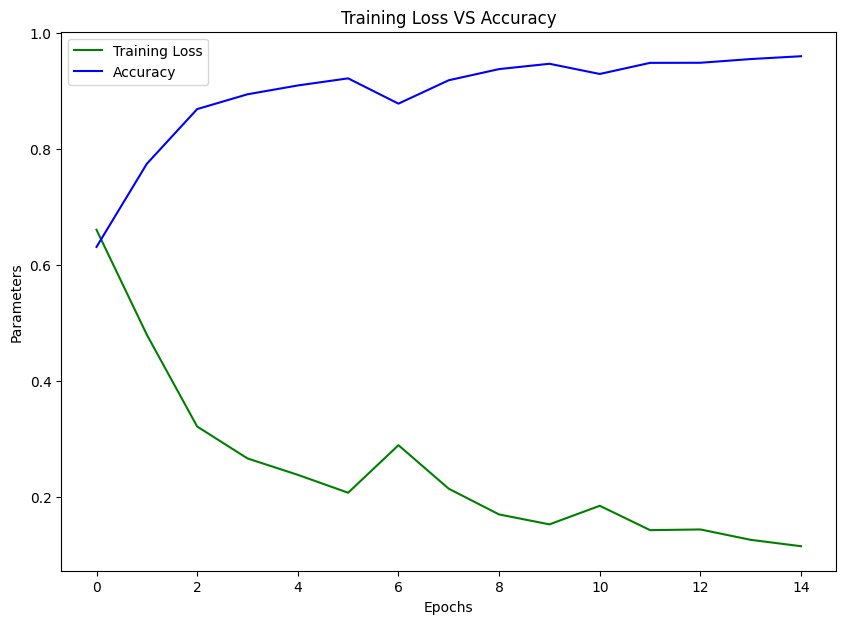

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(model_hist.history['loss'], label = 'Training Loss', color = 'green')
plt.plot(model_hist.history['accuracy'], label = 'Accuracy', color = 'blue')
plt.title("Training Loss VS Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Parameters')
plt.legend()
plt.show()

In [32]:
%%time
scores = model.evaluate(x=X_test,y=y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8719 - loss: 0.3908
CPU times: user 11.2 s, sys: 387 ms, total: 11.6 s
Wall time: 11.9 s


In [33]:
print("Accuracy en test",round(scores[1]*100,2),"%")

Accuracy en test 87.2 %


In [37]:
# Modelo LSTM 2
# Generamos el modelo
model = Sequential()
model.add(Embedding(input_dim = 5000, output_dim = 100, input_length=MAX_LEN))
model.add(LSTM(units = 100,return_sequences=True))
model.add(Dropout(rate=0.5))
model.add(LSTM(units = 50))
model.add(Dropout(rate=0.4))
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(units=256, activation="relu"))
model.add(Dropout(rate=0.4))
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(rate=0.3))
model.add(Dense(units=1, activation="sigmoid"))

# Definimos función de pérdida y optimizador
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [38]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
%%time
model_hist = model.fit(x=X_train,y=y_train,batch_size=1024,epochs=15)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 504ms/step - accuracy: 0.5202 - loss: 0.6915
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 510ms/step - accuracy: 0.4897 - loss: 0.7766
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 516ms/step - accuracy: 0.5040 - loss: 0.6929
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 512ms/step - accuracy: 0.5073 - loss: 0.6925
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 510ms/step - accuracy: 0.5249 - loss: 0.6917
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 520ms/step - accuracy: 0.5591 - loss: 0.6847
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 530ms/step - accuracy: 0.6082 - loss: 0.6621
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 528ms/step - accuracy: 0.7770 - loss: 0.4884
Epoch 9/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 529ms/step - accuracy: 0.8248 - loss: 0.4090
Epoch 10/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 530ms/step - accuracy: 0.8673 - loss: 0.3360
Epoch 11/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 533ms/step - accuracy: 0.8939 - loss: 0.2763
Epoch 12/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 20

In [41]:
%%time
scores = model.evaluate(x=X_test,y=y_test)
print("Accuracy en test",round(scores[1]*100,2),"%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.8669 - loss: 0.3411
Accuracy en test 86.6 %
CPU times: user 19.6 s, sys: 436 ms, total: 20.1 s
Wall time: 21.3 s


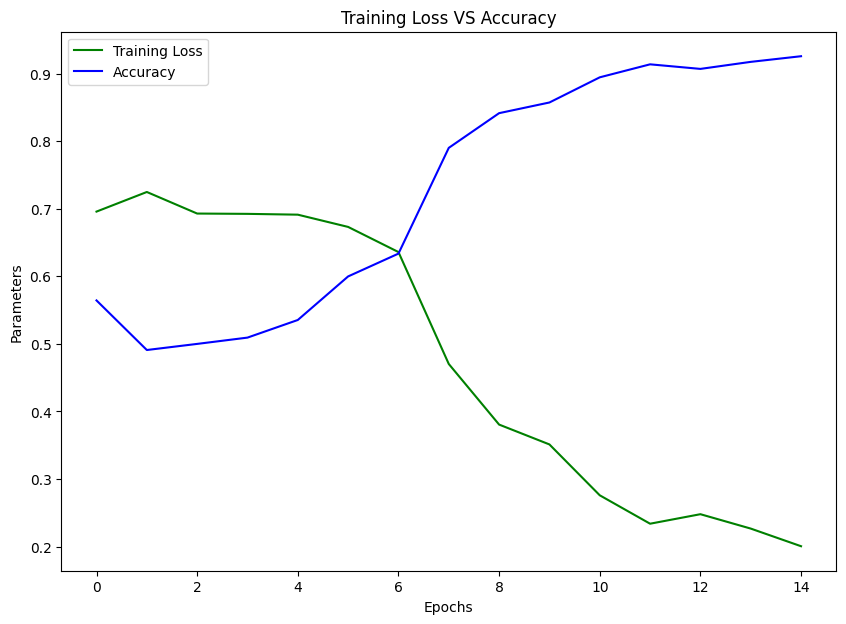

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(model_hist.history['loss'], label = 'Training Loss', color = 'green')
plt.plot(model_hist.history['accuracy'], label = 'Accuracy', color = 'blue')
plt.title("Training Loss VS Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Parameters')
plt.legend()
plt.show()